# Abstract

This blog post explores the implementation and outcome of several data poisoning attacks on a dataset of credit card transactions. Data poisoning is a technique used in adversarial machine learning, where an attacker is able to inject data into the model's training dataset, or alter the dataset itself, in order to manipulate the model's future behavior. The project explores the dataset with visualizations that aided in both the implementation of the models and the choice for the targets of the attacks. We implemented a decision tree classification model from scikit-learn. Using this model, we implemented a targeted attack on specific merchants, successfully altering the model’s classification results in relation to the merchant, without compromising the overall accuracy of the model. Further, we implemented a disabling attack targeted at two categories of transactions which also did not compromise the accuracy of the model, but produced inaccurate classifications within these categories compared to the original model. We believe that our data poisoning attacks on the training data sufficiently affected the behavior of the fraud detection model, while not negatively impacting the overall accuracy of the model on the data as a whole.

[Our general repository](https://github.com/tristanmeyer2/CS451-DataPoisoning)

[Our Jupyter Notebook](https://github.com/tristanmeyer2/CS451-DataPoisoning/blob/main/FraudDetection.ipynb)

# Introduction
Data poisoning is a type of cybersecurity attack aimed at manipulating the training data of a machine learning model in order to introduce unexpected or unintended specific behaviors at the implementation time of the model. We first encountered the topic of data poisoning in the paper, Targeted Backdoor Attacks on Deep Learning Systems Using Data Poisoning, which describes a cyberattack protocol upon a facial recognition system. The paper’s conclusion displays the ability to use a physical key in photographs in a training dataset to manipulate a facial recognition system’s ability to classify a person’s identity reliably, without affecting the model’s accuracy when the physical key is not present (@chen2017targeted).

We were inspired by the wealth of research into attacking generative art models that scrape the web for training data without the consent of the artists whose work the models are trained upon. In specific, the work of the University of Chicago Department of Computer Science’s team, Shawn Shan, et. al., in creating marketable data poisoning filters for artists, such as Glaze and Nightshade. Glaze is a tool for artists that enables them to apply a “style cloak” to their art before publishing online; this cloak applies a filter to their artwork that disrupts a generative model’s ability to train effectively train upon it, while also being imperceptible to the human eye (@shan2023glaze). In a slightly more aggressive manner, Nightshade employs a filter that is directed at text-to-image generative models, and is classified as a prompt-specific data poisoning attack aimed at corrupting a model’s ability to respond to specific targeted prompts. Nightshade applies a filter that does not disrupt a model’s ability to perceive an image, but rather manipulates a model into believing it is perceiving a different image, e.g., cloaking a picture of a cow so that it appears to be a handbag to a generative model. In doing so, Nightshade attacks the effectiveness of a generative art model by manipulating its ability to accurately perceive the artwork that it is trained upon, dramatically decreasing a model’s useability (@shan2024nightshade).

In our project, we aim to recreate the general approaches to a data poisoning attack upon a problem we have seen earlier in our course: financial transaction fraud detection. We hope to create data poisoning attacks on accurate classification models to manipulate a model’s classification output in a targeted manner. In doing so, we believe that our project will illustrate the vulnerabilities of machine learning models, and how those who design and use them ought to create proper security measures in their model’s training procedures, data collection, and data storage.

# Values Statement
We believe that the potential users of our project include machine learning engineers who wish to ensure the security and integrity of their work from those who wish to abuse a company’s reliance on machine learning, security positions within companies that are tasked with issue-spotting in their companies’ models and data protection practices, and companies as a whole, so that they can protect their business operations from manipulation. Others who may benefit from this project include the users who own the data, so that their data and personal information can be better protected, as well as potential victims of fraud, as with the knowledge of how data poisoning works, machine learning engineers can stop more sophisticated fraud attacks.

Many technology users and companies have the potential to be harmed from the practice of data poisoning. If a company releases software that utilizes a machine learning algorithm unprotected from data poisoning attacks, they run the risk of putting out a faulty product that may one day be used maliciously, as well as endangering all of their customers. In the example of a fraud detection system, if a company failed to create sufficient protections against data poisoning attacks, an attacker may be able to manipulate the model in a variety of ways that would financially harm the company and many of its customers, such as forcing the model to always classify a transaction from a certain merchant or customer as fraudulent, allowing fraud from specific sources or in specific sectors to go undetected, or crippling the effectiveness of the entire system.

Due to these risks, we, as aspiring machine learning engineers, hope to better understand the practice of data poisoning so that we can design models and databases in the future that are secure from this threat. Additionally, we believe that some methods of data poisoning can be used for good. As in the aforementioned examples of Glaze and Nightshade, certain methods of preemptive data poisoning can be used to protect intellectual property from automated web scraping and unlicensed model training.

We believe that with a better understanding of what a data poisoning attack looks like, and the extent to which it can detrimentally affect a machine learning model, our work and the work of others can be more secure and safe. If machine learning engineers and database administrators were to create their design processes with possible data poisoning attacks in mind, their models and data protection systems can be more robust, a better asset to their customers and companies, and a tool that users can trust without fear. 

# Materials and Methods

Our data was generated in 2014 by Edgar Alonso Lopez-Rojas and Stefan Axelsson in their paper [BankSim: A Bank Payment Simulation for Fraud Detection Research](https://www.kaggle.com/datasets/ealaxi/banksim1) (@lopezrojasdata). The dataset consists of agent-based simulated financial transactions, synthetically generated based on a sample of transactions provided by a bank in Spain. The main purpose of their paper was to generate accurate and representative synthetic data that can be used for fraud detection research and model building, without using sensitive user-specific data. Each entry in the dataset describes the customer ID of a financial transaction, the age of the transaction (how long ago it occurred), the gender of the customer, the zip code of the payment origin, the merchant ID for the payment, the zip code of the merchant, the category of the payment (e.g., transportation, food, etc.), the payment amount, and a binary variable of whether the payment is fraudulent or not. One potential limitation of our dataset is that they all come from the same bank in Spain, and so the variables of zip code origin and merchant zip code are not useful in our classification models. Additionally, the fraud rates for each transaction category may be only representative of the purchasing habits and fraud rates within this region of Spain, and may not be appropriate to extrapolate upon elsewhere in the world. However, this limitation does not necessarily affect our findings, as we are aiming to manipulate the behavior of a machine learning model, not creating a machine learning model that is useful outside of its localized area.

For our decision tree model, we one-hot encoded all of the categorical features within our dataset so that we could use them as input to our model. Unfortunately, the `customer` feature had so many distinct values that we were unable to one-hot encode all of them, and so we dropped this feature from our dataset. We used the `fraud` feature of the data to use as our target label. We subset our data in a train/test split, where the testing data represents 33% of the total dataset, and the training data represents 66%. We chose the Decision Tree classification model from scikit-learn so that we could analyze the relative importance of each feature in the model’s decision process. We evaluated our models using a variety of metrics, including true positive and true negative rates, which are especially important to the fraud detection problem, as we want both of these rates to be high, as opposed to only one of them. In evaluating our data poisoning attacks, we analyzed the fraud prediction rate of our poisoned and baseline models within the categories which we were attacking, e.g., if we were attacking a specific merchant, we would analyze the fraud prediction rate from both poisoned and unpoisoned decision tree models of instances of this specific merchant in the testing data, to ensure that our attack was affecting the behavior of the model.


# Project Notebook

Importing the data: 

This data set includes seven categorical variables:
* Customer = the customer label for the transaction ('C' followed by a unique number for each customer)
* Gender = the gender of the customer
* Zip code Origin = the zip code of the customer where the transaction occurred 
* Merchant = the merchant label for the transaction ('M' followed by a unique number for each customer)
* Zip code Origin = the zip code of the merchant
* Category = the industry assigned to the transaction
* Fraud = whether the transaction was fraud

The data set also includes two quantitative variables: 
* Age = how long ago (in years) the transaction occurred
* Amount = the dollar amount of the transaction

In [2]:
import pandas as pd

df = pd.read_csv("bankPayments.csv")
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
import torch

In [4]:
import seaborn as sns
import numpy as np

from torch import nn

np.random.seed(1)

Here we are exploring various aspects of the data. First, we see which merchant IDs are the most frequent.

In [5]:
print(df["merchant"].value_counts())

merchant
'M1823072687'    299693
'M348934600'     205426
'M85975013'       26254
'M1053599405'      6821
'M151143676'       6373
'M855959430'       6098
'M1946091778'      5343
'M1913465890'      3988
'M209847108'       3814
'M480139044'       3508
'M349281107'       2881
'M1600850729'      2624
'M1535107174'      1868
'M980657600'       1769
'M78078399'        1608
'M1198415165'      1580
'M840466850'       1399
'M1649169323'      1173
'M547558035'        949
'M50039827'         916
'M1888755466'       912
'M692898500'        900
'M1400236507'       776
'M1842530320'       751
'M732195782'        608
'M97925176'         599
'M45060432'         573
'M1741626453'       528
'M1313686961'       527
'M1872033263'       525
'M1352454843'       370
'M677738360'        358
'M2122776122'       341
'M923029380'        323
'M3697346'          308
'M17379832'         282
'M1748431652'       274
'M1873032707'       250
'M2011752106'       244
'M1416436880'       220
'M1294758098'       191
'M17885

Then, we look at the distribution of gender within the customers that are committing fraudulent payments.

In [6]:
df1 = df[["gender", "fraud"]]
df1.groupby("gender").aggregate('sum')

,fraud
gender,
'E',7
'F',4758
'M',2435
'U',0


Then, we look at the frequency of fraud within different payment categories; it seems that `health` and `sportsandtoys` have the highest frequency of fraud.

In [7]:
df2 = df[["category", "fraud"]]
df2.groupby("category").aggregate('sum')

,fraud
category,
'es_barsandrestaurants',120
'es_contents',0
'es_fashion',116
'es_food',0
'es_health',1696
'es_home',302
'es_hotelservices',548
'es_hyper',280
'es_leisure',474


Here we are investigating the average dollar amount for financial transaction in each payment category.

In [8]:
df3 = df[["category", "amount"]]
df3.groupby("category").aggregate('mean')

,amount
category,
'es_barsandrestaurants',43.461014
'es_contents',44.547571
'es_fashion',65.666642
'es_food',37.070405
'es_health',135.621367
'es_home',165.670846
'es_hotelservices',205.614249
'es_hyper',45.970421
'es_leisure',288.911303


/Users/tristanmeyer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Visualizing the number of Fraudulent Transactions over different Amounts')]

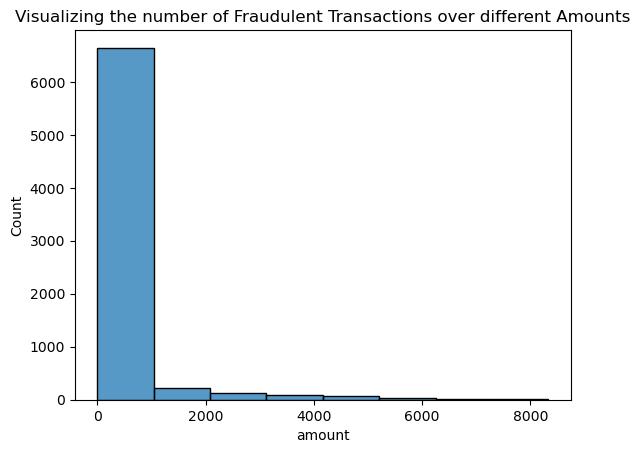

In [9]:
df3 = df[["amount", "fraud"]]
df3 = df3[df3["fraud"] == 1]
v0 = sns.histplot(data=df3, x="amount", bins=8)
v0.set(title="Visualizing the number of Fraudulent Transactions over different Amounts")
#df3['cat_age'] = np.select([df2.amount < 2000, df2.amount < 4000, df2.amount < 6000, df2.amount < 8000], ['<2000', '2000-4000','4000-6000','6000-8000'], '>8000')

This visualization shows the number of fraudulent transactions over different amounts. As the chart shows, the majority of fraudulent transactions occur with amounts under 1000$. 

<Axes: title={'center': 'Visualizing the number of Fraudulent Transactions for each Category'}, xlabel='Fraud Count', ylabel='Category'>

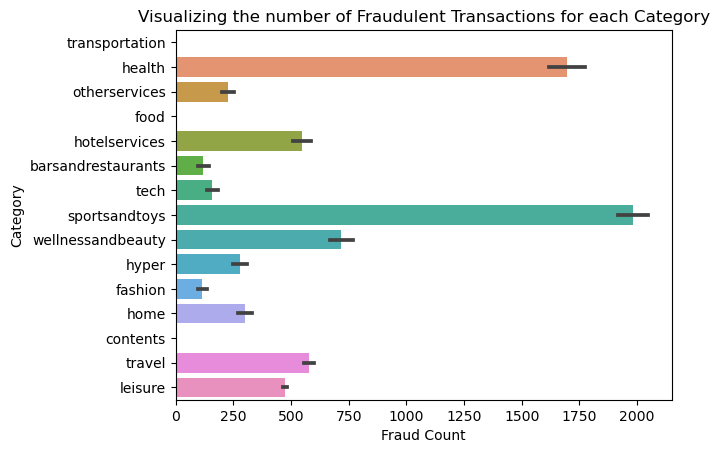

In [10]:
df_vis = df.copy()
df_vis["category"] = df_vis["category"].str.slice(4,-1)

v1 = sns.barplot(df_vis, x="fraud", y="category", estimator="sum")
v1.set(xlabel="Fraud Count", ylabel="Category", title="Visualizing the number of Fraudulent Transactions for each Category")
v1

This chart shows the number of fraudulent transactions in different categories. As shown, the sports and toys, and health categories have the highest amount of fraudulent transactions. 

<Axes: title={'center': 'Visualizing the Average Amount spent per Transaction for each Category'}, xlabel='Average Amount', ylabel='category'>

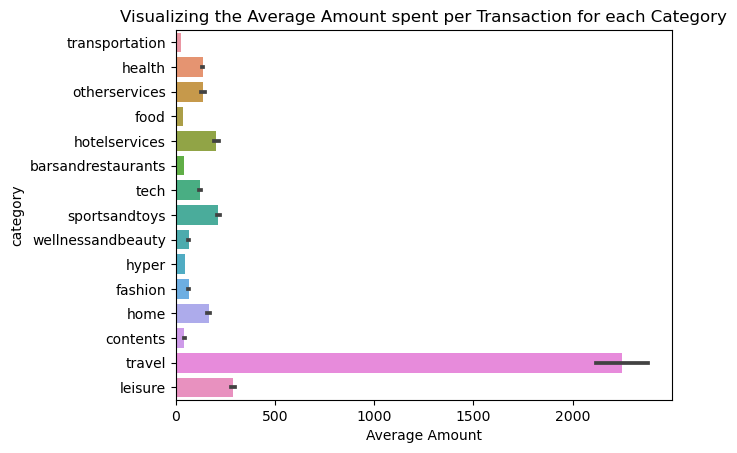

In [11]:
v2 = sns.barplot(df_vis, x="amount", y="category")
v2.set(xlabel="Average Amount", title="Visualizing the Average Amount spent per Transaction for each Category")
v2

This chart visualizes the average amount of transactions in each category. As shown, the travel category has the largest average amount per transaction, with an average over 2000$. 

In [12]:
print(len(df))
print(len(df[df['fraud'] == 0]))
print(len(df[df['fraud'] == 1]))

594643
587443
7200


Our data set contains 594643 total transactions, in which 587443 are not fraud and 7200 are fraud. This different between fraudulent transactions and not fraudulent transactions shows the imbalanced nature of this dataset. This will inform our evaluation method: we need to pay attention to both the true positive and true negative rates to ensure the effectiveness of our model. The true positive rate will represent the model's ability to correctly identify positive instances of fraud.

# Decision Tree Model

We use a scikit-learn Decision Tree Classifier model, for its ability to observe which variables are the most important to a fraud detection model and which variables may be most vulnerable to different attacks.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection


tree_model = DecisionTreeClassifier(random_state=0)

Here we do some data preprocessing, dropping columns that are not useful or too large to be one-hot encoded.

In [14]:
cols = df.columns
cols = cols.drop(['customer', 'zipcodeOri', 'zipMerchant', 'fraud', 'step'])
X = df[cols]
X = pd.get_dummies(X, dtype= float)
y = df['fraud']

Then we do a train/test split, with our test data being 33% of our total dataset.

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33)

Now we train our Decision Tree model.

In [16]:
torch.manual_seed(1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Using cross validation to improve our model.

In [17]:
cross_val_score(tree_model, X_train, y_train, cv = 3)

array([0.99351676, 0.9939158 , 0.9936899 ])

Now we test its effectiveness by analyzing its true positive rate and true negative rates on both training and test data. As we can see, the model performs remarkably well on the training data, and has a sufficiently high fraud detection rate (show by the true positive rate) on the testing data.

In [18]:
from sklearn.metrics import confusion_matrix

train_preds = tree_model.predict(X_train)
y_true = y_train

tn, fp, fn, tp = confusion_matrix(y_true= y_true, y_pred= train_preds).ravel()
print(f'True Positive Rate on Training Data with Unpoisoned Model = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Training Data with Unpoisoned Model = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Training Data with Unpoisoned Model = 99.79%
True Negative Rate on Training Data with Unpoisoned Model = 100.00%


In [19]:
test_preds = tree_model.predict(X_test)
y_true = y_test

tn, fp, fn, tp = confusion_matrix(y_true= y_true, y_pred= test_preds).ravel()
tp_unpoisoned = f'True Positive Rate on Test Data with Unpoisoned Model = {tp/(tp+fn)*100:.2f}%'
tn_unpoisoned = f'True Negative Rate on Test Data with Unpoisoned Model = {tn/(tn+fp) * 100:.2f}%'
print(tp_unpoisoned)
print(tn_unpoisoned)

True Positive Rate on Test Data with Unpoisoned Model = 76.18%
True Negative Rate on Test Data with Unpoisoned Model = 99.71%


With a relatively high true positive rate, this is a sufficiently accurate fraud detection model for our purposes.

Now, we investigate how the variables were used in this decision tree, so that we can find the features of the data that were most important in the classification process, and thus most vulnerable to an injection.

In [20]:
import numpy as np
assert len(X.columns) == len(tree_model.feature_importances_)

importance_data = {
    'feature': X.columns,
    'importance': tree_model.feature_importances_
}
imp = pd.DataFrame(importance_data).sort_values(by= 'importance', axis = 0, ascending = False)
imp.head(10)

,feature,importance
0,amount,0.716596
62,merchant_'M980657600',0.059733
13,merchant_'M1053599405',0.025989
47,merchant_'M480139044',0.021692
36,merchant_'M1913465890',0.018560
71,category_'es_leisure',0.018383
56,merchant_'M855959430',0.010980
34,merchant_'M1873032707',0.009916
3,age_'2',0.008878
10,gender_'F',0.007778


## Data Poisoning (Appending Rows: Targeting Specific Merchants)

Merchant-specific analysis for data poisoning. Here we are looking at the most important merchants in the decision tree, and determining whether they are important because they commit a lot of fraud or because they commit very little, i.e., whether they have a positive or negative effect on the decision process of the model.

In [21]:
df4 = df[['merchant', 'fraud']]

m_98065_count = df4['merchant'].value_counts()["'M980657600'"]
m_10535_count = df4['merchant'].value_counts()["'M1053599405'"]
m_19134_count = df4['merchant'].value_counts()["'M1913465890'"]
m_48013_count = df4['merchant'].value_counts()["'M480139044'"]

df4 = df4.groupby('merchant')['fraud'].sum()
m_98065_fraud = df4["'M980657600'"]
m_10535_fraud = df4["'M1053599405'"]
m_19134_fraud = df4["'M1913465890'"]
m_48013_fraud = df4["'M480139044'"]

print(f'Rate of fraud for merchant M980657600:  {m_98065_fraud/m_98065_count:0.2f}%')
print(f'Rate of fraud for merchant M1053599405: {m_10535_fraud/m_10535_count:0.2f}%')
print(f'Rate of fraud for merchant M1913465890: {m_19134_fraud/m_19134_count:0.2f}%')
print(f'Rate of fraud for merchant M480139044:  {m_48013_fraud/m_48013_count:0.2f}%')

Rate of fraud for merchant M980657600:  0.83%
Rate of fraud for merchant M1053599405: 0.00%
Rate of fraud for merchant M1913465890: 0.00%
Rate of fraud for merchant M480139044:  0.47%


It seems that merchants M980657600 and M480139044 are important to the decision tree due to their high rates of fraud, while merchants M1053599405 and M1913465890 are important due to their extremely low rate of fraud. A potential data poisoning attack strategy on these two merchants would likely involve injecting data that would change their fraud rates within the dataset, so that the decision tree model's behavior upon test data that contains instances of these merchants would be affected.

Another possible attack could look at the least important features of a classification model, and try to heavily influence the outcomes regarding a specific person/business (i.e., merchant). For example, for a merchant whose ID is listed as very low on the decision tree, which likely means that there are very few data points involving that merchant, we could try to influence the model to always flag fraud on all transactions involving that merchant, without affecting the overall accuracy of the model.

In [22]:
non_imp = pd.DataFrame(importance_data).sort_values(by= 'importance', axis = 0, ascending = True)
non_imp.head(16)

,feature,importance
77,category_'es_wellnessandbeauty',0.0
51,merchant_'M677738360',0.0
45,merchant_'M3697346',0.0
43,merchant_'M348934600',0.0
58,merchant_'M85975013',0.0
37,merchant_'M1946091778',0.0
31,merchant_'M1823072687',0.0
26,merchant_'M1726401631',0.0
24,merchant_'M1600850729',0.0
22,merchant_'M151143676',0.0


In [23]:
df6 = df[['merchant', 'fraud']]

m_67773_count = df6['merchant'].value_counts()["'M677738360'"]
print(m_67773_count)

358


It seems that merchant M677738360 is rated as a non-important feature by the decision tree, and has relatively few data points. We will attempt a data poisoning attack that will inject enough data points to ensure that this merchant is consistently flagged for fraud by the decision tree, without affecting the overall accuracy of our model.

In [24]:
X_train_poison = X_train.copy()
X_train_poison['fraud'] = y_train.copy()

In [25]:
m_67773_examples = X_train_poison[X_train_poison['merchant_\'M677738360\''] == 1.0]
m_67773_examples.head(5)

,amount,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',gender_'E',...,category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty',fraud
453713,74.73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
333756,148.30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
550667,56.72,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
405390,34.40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
110299,110.43,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
print(f"Merchant M67773830 has a fraud rate of {m_67773_examples['fraud'].mean():.1f}%.")
print(f'They have only {m_67773_examples.shape[0]} transactions within the training set.')

Merchant M67773830 has a fraud rate of 0.0%.
They have only 249 transactions within the training set.


Now we will construct an injection for Merchant M677738360 based upon 200 real data points with a positive fraud value. We will test how many injections it will take for the decision tree model to always flag their transactions for fraud, and then test to see whether these injections affect the overall accuracy rate of the model. We experimented previously with smaller values for $n$, the sample size, but encountered an interesting problem: since the decision tree model values the feature `amount` so heavily, if we were to create data injections that were fraudulent and had similar values for `amount`, the decision tree model would not see this as an indication of the specific merchant being indicative of fraud, but rather the amount values themselves. To avoid this issue, we took a large sample of the merchant's transactions, so that the `amount` value for our injections were varied, yet still representative of the merchant's true transactions.

In [27]:
m_67773_injection = X_train_poison[X_train_poison['merchant_\'M677738360\''] == 1.0].sample(n= 200, replace= False)

m_67773_injection = pd.DataFrame.from_dict(m_67773_injection)

m_67773_injection['fraud'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [28]:
inj_size = len(m_67773_injection)

Here, we experiment with our injection size, taking subsets of our injection and appending them to our training dataset. We increment each test by 100 injection points, up to a total injection size of 1000 data points. In each iteration, we train a new decision tree model, fit it to our training dataset containing the data poisoning injections, and compare its fraud detection predictions on the specific merchant's data points in the testing data set.

In [29]:
X_train_poison_explore = X_train_poison.copy()

for i in range(0, 10):
    # injection step
    if (i % 2 == 0):
        X_train_poison_explore = pd.concat([X_train_poison_explore.copy(), m_67773_injection[:int(inj_size/2)].copy()], axis=0)
    else:
        X_train_poison_explore = pd.concat([X_train_poison_explore.copy(), m_67773_injection[int(inj_size/2):].copy()], axis=0)


    # splitting X and y for decision tree training, dropping fraud feature
    y_train_poison_explore = X_train_poison_explore['fraud'].copy()
    cols = X_train_poison_explore.columns
    cols = cols.drop(['fraud'])
    X_train_poison_explore = X_train_poison_explore[cols]

    # instantiating new iteration of decision tree and fitting
    tree_model_poison = DecisionTreeClassifier(random_state=0)
    tree_model_poison.fit(X_train_poison_explore, y_train_poison_explore)

    cross_val_score(tree_model_poison, X_train_poison_explore, y_train_poison_explore, cv = 3)

    # evaluation of current injection attack on the model's classification of the merchant
    m_67773_preds_poison = tree_model_poison.predict(X_test[X_test['merchant_\'M677738360\''] == 1.0])
    m_67773_preds_unpoisoned = tree_model.predict(X_test[X_test['merchant_\'M677738360\''] == 1.0])

    print(f'For an injection size of {(i+1)*(int(inj_size/2))}')
    print(f'The poisoned model predicts that {m_67773_preds_poison.mean()*100:.2f}% of the testing data points with the Merchant ID M677738360 are fraudulent.')
    print(f'The normal model predicts that {m_67773_preds_unpoisoned.mean()*100:.2f}% of the testing data points with the Merchant ID M677738360 are fraudulent.')

    # resetting the exploration dataframe for next iteration
    X_train_poison_explore['fraud'] = y_train_poison_explore

For an injection size of 100
The poisoned model predicts that 0.00% of the testing data points with the Merchant ID M677738360 are fraudulent.
The normal model predicts that 0.00% of the testing data points with the Merchant ID M677738360 are fraudulent.
For an injection size of 200
The poisoned model predicts that 0.00% of the testing data points with the Merchant ID M677738360 are fraudulent.
The normal model predicts that 0.00% of the testing data points with the Merchant ID M677738360 are fraudulent.
For an injection size of 300
The poisoned model predicts that 33.03% of the testing data points with the Merchant ID M677738360 are fraudulent.
The normal model predicts that 0.00% of the testing data points with the Merchant ID M677738360 are fraudulent.
For an injection size of 400
The poisoned model predicts that 76.15% of the testing data points with the Merchant ID M677738360 are fraudulent.
The normal model predicts that 0.00% of the testing data points with the Merchant ID M6777

It seems that the data poisoning injection overcomes the low-importance of the merchant ID M677738360 feature within the decision tree model after roughly 300 injections, and that the poisoning effect plateaus at an injection size of around 600, creating a fraud rate classification rate of approximately 75% within this merchant's transactions.

We'll use this minimal injection size of $n=600$ to further analyze this attack's effectiveness and detectability.

In [30]:
# injection step
m_67773_injection_big = m_67773_injection.copy()

for i in range(2):
    m_67773_injection_big = pd.concat([m_67773_injection_big.copy(), m_67773_injection.copy()], axis=0)

print(f"Size of injection: {len(m_67773_injection_big)}")

Size of injection: 600


In [31]:
X_train_poison = pd.concat([X_train_poison, m_67773_injection_big], axis=0)

m_67773_instances = X_train_poison[X_train_poison['merchant_\'M677738360\''] == 1.0]
    
print(f'Number of instances with merchant ID M677338360 in the training data: {len(m_67773_instances)}')
print(f"Fraud rate for this specific merchant within the training data: {m_67773_instances['fraud'].mean()*100:.2f}%")

Number of instances with merchant ID M677338360 in the training data: 849
Fraud rate for this specific merchant within the training data: 70.67%


With the injection, the fraud rate of merchant M677738360 increased to 70.7%

In [32]:
# splitting X and y for decision tree training
y_train_poison = X_train_poison['fraud'].copy()
cols = X_train_poison.columns
cols = cols.drop(['fraud'])
X_train_poison = X_train_poison[cols]

Preparing the data for training by splitting the into X and y data frames.

In [33]:
# fitting iterations of the decision tree
tree_model_poison = DecisionTreeClassifier(random_state=0)
tree_model_poison.fit(X_train_poison, y_train_poison)

cross_val_score(tree_model_poison, X_train_poison, y_train_poison, cv = 3)

array([0.99253406, 0.99290242, 0.98975963])

In [34]:
m_67773_preds_poison = tree_model_poison.predict(X_test[X_test['merchant_\'M677738360\''] == 1.0])
m_67773_preds_unpoisoned = tree_model.predict(X_test[X_test['merchant_\'M677738360\''] == 1.0])

print(f'The poisoned model predicts that {m_67773_preds_poison.mean()*100:.2f}% of the testing data points with the Merchant ID M677738360 are fraudulent.')
print(f'The normal model predicts that {m_67773_preds_unpoisoned.mean()*100:.2f}% of the testing data points with the Merchant ID M677738360 are fraudulent.')

The poisoned model predicts that 75.23% of the testing data points with the Merchant ID M677738360 are fraudulent.
The normal model predicts that 0.00% of the testing data points with the Merchant ID M677738360 are fraudulent.


In [35]:
test_preds_poison = tree_model_poison.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_true= y_test, y_pred= test_preds_poison).ravel()
print(f'True Positive Rate on Testing Data with Poisoned Model = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Testing Data with Poisoned Model = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Testing Data with Poisoned Model = 76.06%
True Negative Rate on Testing Data with Poisoned Model = 99.66%


In [36]:
print(tp_unpoisoned)
print(tn_unpoisoned)

True Positive Rate on Test Data with Unpoisoned Model = 76.18%
True Negative Rate on Test Data with Unpoisoned Model = 99.71%


As can be seen, the model trained upon the poisoned data set (the poisoned model) predicts that 75.23% of all instances of this specific merchant in the testing data are fraudulent, when the baseline (unpoisoned model) predicts an accurate 0% fraud rate. This dramatically increases the likelihood that this merchant will be flagged for fraud if they attempt to make any kind of transaction in the future. Looking at how the 600 point injection affects the total model accuracy, we can see that the true positive and true negative rates only fluctuate by 0.1% each, making our injection very difficult to detect when assessing the performance of the model as a whole.

## Data Poisoning Test (Altering Transactions: Targeting Leisure and Health Categories)

In [37]:
imp.head(10)

,feature,importance
0,amount,0.716596
62,merchant_'M980657600',0.059733
13,merchant_'M1053599405',0.025989
47,merchant_'M480139044',0.021692
36,merchant_'M1913465890',0.018560
71,category_'es_leisure',0.018383
56,merchant_'M855959430',0.010980
34,merchant_'M1873032707',0.009916
3,age_'2',0.008878
10,gender_'F',0.007778


The two first categories that have the greatest impact on our models decisions are leisure and health. To attack these two categories, we needed to understand how they affect the model. 

In [38]:
X_train_poison = X_train.copy()
X_train_poison['fraud'] = y_train.copy()

In [39]:
X_leisure = X_train_poison.loc[X_train_poison["category_\'es_leisure\'"] == 1.0]
print(f"Unpoisoned leisure category fraud rate: {X_leisure['fraud'].mean()*100:.2f}%")

Unpoisoned leisure category fraud rate: 94.50%


The leisure category had a 94% fraud rate, and therefore likely influences the model positively to predict fraud, when a data point contains the leisure category. 

In [40]:
X_health = X_train_poison.loc[X_train_poison["category_\'es_health\'"] == 1.0]
print(f"Unpoisoned health category fraud rate: {X_health['fraud'].mean()*100:.2f}%")

Unpoisoned health category fraud rate: 10.34%


In comparison, the health category had a 10% fraud rate, and therefore likely influences the model to not predict fraud given the health category. 

Our aim for this data poisoning attack is to render these two very features that are very important to the decision tree model unuseable. To do this, we will try to alter their fraud rates to around 50% each, so that the use of these features in a decision process is no better than flipping a coin.

## Altering 1,000 data points

We will begin by altering 1,000 data points in the model training data, which is a slightly different method of attack than our last attack. Here, we are altering the data points to poison them, while in the last attack, we were appending the poisoned rows, hoping to overcome the unpoisoned rows.

In [41]:
X_train_poison1 = X_train_poison.copy()

leisure_idxs1 = X_train_poison1[X_train_poison1['category_\'es_leisure\''] == 1.0].index
health_idxs1  = X_train_poison1[X_train_poison1['category_\'es_health\''] == 1.0].index

for i in range(1000):
    if i%10 == 0:
        X_train_poison1.at[leisure_idxs1[int(i/10)], 'fraud'] = 0
    else: 
        X_train_poison1.at[health_idxs1[i], 'fraud'] = 1

We alter only 100 points in leisure and 900 points in health because there are only 324 points in leisure, but tens of thousands of data points with the health category.

In [42]:
X_leisure_poison = X_train_poison1.loc[X_train_poison1['category_\'es_leisure\''] == 1.0]
print(f"Poisoned leisure category fraud rate: {X_leisure_poison['fraud'].mean()*100:.2f}%")

Poisoned leisure category fraud rate: 66.36%


The alteration decreased the leisure category's fraud rate from 94% to 66%.

In [43]:
X_health_poison = X_train_poison1.loc[X_train_poison1['category_\'es_health\''] == 1.0]
print(f"Poisoned health category fraud rate: {X_health_poison['fraud'].mean()*100:.2f}%")

Poisoned health category fraud rate: 17.74%


The alteration increased the health category's fraud rate from 10% to 18%.

## Altering 5,000 data points

We then experiment with altering far more data points within the health category, as it is far larger than the leisure category. We alter 5,000 rows in total to poison them.

In [44]:
X_train_poison2 = X_train_poison.copy()

leisure_idxs2 = X_train_poison2[X_train_poison2['category_\'es_leisure\''] == 1.0].index
health_idxs2  = X_train_poison2[X_train_poison2['category_\'es_health\''] == 1.0].index

for i in range(5000):
    if i%50 == 0:
        X_train_poison2.at[leisure_idxs2[int(i/50)], 'fraud'] = 0
    else: 
        X_train_poison2.at[health_idxs2[i], 'fraud'] = 1

For this reason, we still alter only 100 points in leisure and alter 4900 points in health.

In [45]:
X_leisure_poison2 = X_train_poison2.loc[X_train_poison2['category_\'es_leisure\''] == 1.0]
print(f"Poisoned leisure category fraud rate: {X_leisure_poison2['fraud'].mean()*100:.2f}%")

Poisoned leisure category fraud rate: 66.36%


The alteration still decreases the leisure category's fraud rate from 94% to 66%.

In [46]:
X_health_poison2 = X_train_poison2.loc[X_train_poison2['category_\'es_health\''] == 1.0]
print(f"Poisoned health category fraud rate: {X_health_poison2['fraud'].mean()*100:.2f}%")

Poisoned health category fraud rate: 50.46%


Now, the alteration increased the health category's fraud rate from 10% to 50%.

This second data poisoning attack has brought both categories' fraud rates to around 50%. We will use this attack to evaluate its effect on the model's ability to predict data points with these features in the testing data.

In [47]:
X_train_poison = X_train_poison2.copy()

y_train_poison = X_train_poison['fraud']
cols = X_train_poison.columns
cols = cols.drop(['fraud'])
X_train_poison = X_train_poison[cols]

In [48]:
tree_model_poison = DecisionTreeClassifier(random_state=0)
tree_model_poison.fit(X_train_poison, y_train_poison)

DecisionTreeClassifier(random_state=0)

In [49]:
cross_val_score(tree_model_poison, X_train_poison, y_train_poison, cv = 3)

array([0.98485738, 0.9807911 , 0.97600205])

Evaluating overall accuracy of the poisoned decision tree model on its predictions for the leisure and health categories in the testing data.

In [50]:
leisure_preds_poison = tree_model_poison.predict(X_test[X_test['category_\'es_leisure\''] == 1.0])
leisure_preds_unpoisoned = tree_model.predict(X_test[X_test['category_\'es_leisure\''] == 1.0])

print(f'The poisoned model predicts that {leisure_preds_poison.mean()*100:.2f}% of the testing data points within the leisure category are fraudulent.')
print(f'The normal model predicts that {leisure_preds_unpoisoned.mean()*100:.2f}% of the testing data points within the leisure category are fraudulent.')

The poisoned model predicts that 63.95% of the testing data points within the leisure category are fraudulent.
The normal model predicts that 95.35% of the testing data points within the leisure category are fraudulent.


In [51]:
health_preds_poison = tree_model_poison.predict(X_test[X_test['category_\'es_health\''] == 1.0])
health_preds_unpoisoned = tree_model.predict(X_test[X_test['category_\'es_health\''] == 1.0])

print(f'The poisoned model predicts that {health_preds_poison.mean()*100:.2f}% of the testing data points within the health category are fraudulent.')
print(f'The normal model predicts that {health_preds_unpoisoned.mean()*100:.2f}% of the testing data points within the health category are fraudulent.')

The poisoned model predicts that 50.14% of the testing data points within the health category are fraudulent.
The normal model predicts that 10.92% of the testing data points within the health category are fraudulent.


However, did our injection affect the overall testing accuracy of the model?

In [52]:
from sklearn.metrics import confusion_matrix

test_preds_poison = tree_model_poison.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_true= y_test, y_pred= test_preds_poison).ravel()
print(f'True Positive Rate on Testing Data with Poisoned Model = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Testing Data with Poisoned Model = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Testing Data with Poisoned Model = 76.26%
True Negative Rate on Testing Data with Poisoned Model = 98.68%


Comparing them with our unpoisoned model's evalution:

In [53]:
print(tp_unpoisoned)
print(tn_unpoisoned)

True Positive Rate on Test Data with Unpoisoned Model = 76.18%
True Negative Rate on Test Data with Unpoisoned Model = 99.71%


As seen in the true positive and negative rates of the poisoned and not poisoned models, the accuracy fluctuated by around 0.1% in the true positive rate and around 1% in the true negative rate. Since this data poisoning attack does not drastically compromise the overall accuracy of the model, it is relatively undetectable when assessing the performance of the model on the overall representation of data. However, the attack greatly impacts the ability for the decision tree model to accurately predict fraud in transactions in the leisure and health categories.

# Results 

We implemented a decision tree model that produced a true positive rate (predicting fraudulent transactions) of 76.2% accuracy in the testing data and a true negative rate (predicting non-fraudulent transactions) of 99.7% accuracy in the testing data. We then constructed a targeted data poisoning attack on merchant M677738360, which consisted of a 600 point injection. Before poisoning, the decision tree model had a **0% positive fraud rate** prediction on merchant M677738360.
 
After the targeted attack, the model predicted that **75.23% of merchant M677738360’s transactions were fraudulent**, dramatically increasing the likelihood that this specific merchant will be flagged for fraud by the detection model if they attempt to make any transaction in the future. Further, this injection had very little impact on the overall accuracy of the model. The baseline model (trained on the true dataset without data poisoning) still had true positive and negative rates of 76.2% and 99.7%, respectively. In comparison, the poisoned model had true positive and negative rates of 76.1% and 99.7%, respectively. This difference of only 0.1% in the true positive rate leads us to believe that our attack would be relatively undetectable when evaluating the poisoned model’s performance on a representative sample of the dataset.

In an attempt to poison our model by altering transactions in the leisure and health categories, we conducted alterations to determine the extent in which we could corrupt our model. The **leisure category had a fraud rate of 94.5%** and the **health category had a fraud rate of 10.3%**. Our attack intended to change both of these fraud rates to around 50%, so that these features of the data would not be useful to the fraud detection model. We experimented by altering a set of 1,000 data points and a set of 5,000 data points. The test that altered 5,000 points in the leisure and health categories resulted in a fraud prediction rate decrease from **94.5% to 66.3% in the leisure category** and an increase from **10.3% to 50.4% in the health category**. 

In comparing these models across these categories, the **baseline model predicted fraud in 95%** of the testing data in the **leisure category**, while the **poisoned model only predicted fraud in 63%** of the testing data in the **leisure category**. For the health category, the **baseline model predicted fraud in 11% of the testing data labeled as health**, while the **poisoned model predicted fraud in 50%** of the testing data in the **health category**. Further, this 5,000 point altercation did not drastically impact the overall accuracy of the model. The baseline model had true positive and negative rates of 76.2% and 99.7%, respectively. In comparison, the poisoned model had true positive and negative rates of 76.3% and 98.7%, respectively. Again, this leads us to believe that our attack would be relatively undetectable when evaluating the poisoned model’s performance on a representative sample of the dataset.


# Conclusion
We were able to implement a decision tree model that accurately predicted fraudulent credit card transactions. Using this model, we constructed two successful data poisoning attacks, both targeting specific features and disabling the models’ functionality within certain categories. In both of these attacks, our data injections did not affect the overall accuracy of the fraud detection model, which we believe makes our attacks virtually undetectable. Therefore, our initial goals of creating an accurate model and poisoning the model were met. However, given the scale and power of the data poisoning attacks we researched, we produced a far more elementary and detectable attack than we were envisioning at the start of the project. After studying techniques used by tools like Glaze and Nightshade, we created expectations that our attacks would not only be difficult to detect, but also fully cripple our models. Given the simplicity of our dataset, we were limited to only a few targets and techniques for poisoning, which made our expectations far harder to reach. With more time, we could have experimented on a larger scale with other data types, potentially attempting attacks akin to Glaze or Nightshade, and more interesting attacks on models that train using computer vision. However, considering our time constraints and lack of expertise, we managed to achieve our goals efficiently and effectively.


# Group Contributions Statement

Tristan worked on the visualizations and aggregate charts for the data set. Oscar implemented and tested the decision tree model. We worked together on both data poisoning attacks, but Oscar predominantly worked on the merchant attack and Tristan worked on the category attack. Tristan wrote the abstract, results, and concluding sections of the blog post and Oscar wrote the introduction, values statement, materials and methods, and bibliography sections. We believe that we had a very comparable work distribution.

## Personal Reflections

The process of researching and implementing our data poisoning project taught me the basics of data poisoning attacks. The implementation of the decision tree model was great practice in data preparation and using sklearn models. The project helped me dig deeper into the drivers of the model and how they impact the predictions. The targeted data poisoning attack also helped me better understand the inner workings of the decision tree model. This attack was great practice in modifying pandas dataframes, as well. The broader disabling attack was also helpful pandas practice and was important to my understanding of the importance of different features affecting the decision tree model. 

I believe we exceeded our initial goals for the project. We implemented a successful and accurate model to predict fraudulent transactions. We also implemented two successful data poisoning attacks that targeted different features of the dataset and with different motivations for each. Therefore, I think in every aspect we exceeded our expectations. 

This project was great practice in compiling a successful project from start to finish. I think the collaborative workflow was a key skill that I developed in this project that I will take to future experiences later in life. Oscar and I learned to work with each other on different areas of the project so that we efficiently achieved all of our starting goals. 


# References
